In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
data=pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
data.isnull().sum()
data["total_bedrooms"].fillna(0,inplace=True)


In [14]:
x=data.iloc[:,[5,7]]

In [17]:
#print(transformed)
x=StandardScaler().fit_transform(x)
kmeans=KMeans(6)
kmeans.fit(x)


C:\Users\nimit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [18]:
y_predict=kmeans.fit_predict(x)
data.head()

C:\Users\nimit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


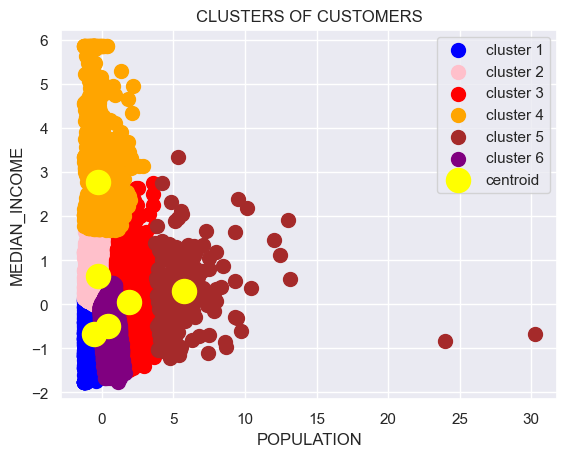

In [21]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='pink',label='cluster 2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='red',label='cluster 3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='orange',label='cluster 4')
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='brown',label='cluster 5')
plt.scatter(x[y_predict==5,0],x[y_predict==5,1],s=100,c='purple',label='cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title('CLUSTERS OF CUSTOMERS')
plt.xlabel('POPULATION')
plt.ylabel('MEDIAN_INCOME')
plt.legend()
plt.show()